In [319]:
'''
This notebook explores the data produced by Apple Maps App relating to various regions, countries and locations.
Locations chose were Australia, UK and USA, although other locations could easyily have been as well.
Inititall the data is checked, and converted into appropriate form for easy plotting. Then, the three countries are compared.
by Kieran O'Donnell 14/04/2020
'''
#csv data may be viewed or downloaded from the following URL:
url = 'https://www.apple.com/covid19/mobility/'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.ticker import PercentFormatter


In [100]:
df = pd.read_csv('applemobilitytrends-2020-04-12.csv')

In [101]:
df.head()

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,24.11,20.54,22.54,26.40,26.03,26.43,26.70,26.32,25.47,24.89
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.76,24.90,23.92,31.13,25.80,29.81,28.96,27.29,27.63,29.59
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,17.15,15.13,11.53,17.24,18.55,19.95,19.80,16.80,19.40,12.89
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,12.44,10.97,9.12,11.85,13.49,15.51,14.65,13.58,15.75,10.45
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,41.58,33.34,51.75,53.17,55.01,59.24,33.19,36.00,26.95,31.72


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 94 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   geo_type             395 non-null    object 
 1   region               395 non-null    object 
 2   transportation_type  395 non-null    object 
 3   2020-01-13           395 non-null    int64  
 4   2020-01-14           395 non-null    float64
 5   2020-01-15           395 non-null    float64
 6   2020-01-16           395 non-null    float64
 7   2020-01-17           395 non-null    float64
 8   2020-01-18           395 non-null    float64
 9   2020-01-19           395 non-null    float64
 10  2020-01-20           395 non-null    float64
 11  2020-01-21           395 non-null    float64
 12  2020-01-22           395 non-null    float64
 13  2020-01-23           395 non-null    float64
 14  2020-01-24           395 non-null    float64
 15  2020-01-25           395 non-null    flo

In [130]:
df['2020-01-13'] = df['2020-01-13'].astype(np.float64)#Change type to float

In [309]:
df[df['region']=='Australia'].iloc[:,2:].T #Look at transposed data for Australia

,3,4,5
transportation_type,driving,transit,walking
2020-01-13,100,100,100
2020-01-14,102.98,101.78,101.31
2020-01-15,104.21,100.64,101.82
2020-01-16,108.63,99.58,104.52
...,...,...,...
2020-04-08,59.24,21.28,47.21
2020-04-09,33.19,16.63,34.06
2020-04-10,36,16.78,35.99
2020-04-11,26.95,13.94,31.33


In [171]:
type(df[df['region']=='Australia'].iloc[:,2:].T)

pandas.core.frame.DataFrame

In [187]:
df[df['region']=='Australia'].iloc[:,3:].T

,3,4,5
2020-01-13,100.00,100.00,100.00
2020-01-14,102.98,101.78,101.31
2020-01-15,104.21,100.64,101.82
2020-01-16,108.63,99.58,104.52
2020-01-17,109.08,98.34,113.73
...,...,...,...
2020-04-08,59.24,21.28,47.21
2020-04-09,33.19,16.63,34.06
2020-04-10,36.00,16.78,35.99
2020-04-11,26.95,13.94,31.33


In [188]:
(df[df['region']=='Australia'].iloc[:,3:].T).info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 2020-01-13 to 2020-04-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   3       91 non-null     float64
 1   4       91 non-null     float64
 2   5       91 non-null     float64
dtypes: float64(3)
memory usage: 2.8+ KB


Text(0.5, 1.0, 'Transport vs COVID-19 Metrics in Australia')

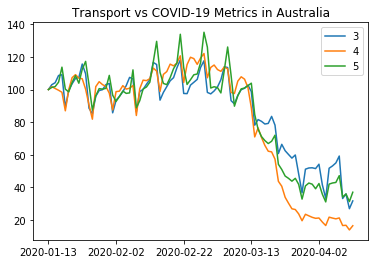

In [257]:
#Base Plot
df[df['region']=='Australia'].iloc[:,3:].T.plot()
plt.title('Transport vs COVID-19 Metrics in Australia')

In [258]:
#Set DAus as its own Data Frame
#Should allow to compare differenr regions
dAus = df[df['region']=='Australia'].iloc[:,3:].T

In [284]:
#Change Column Names
dAus.columns = ['Aus Driving', 'Aus Transit', 'Aus Walking']

Text(0.5, 1.0, 'Transport vs COVID-19 Metrics in Australia')

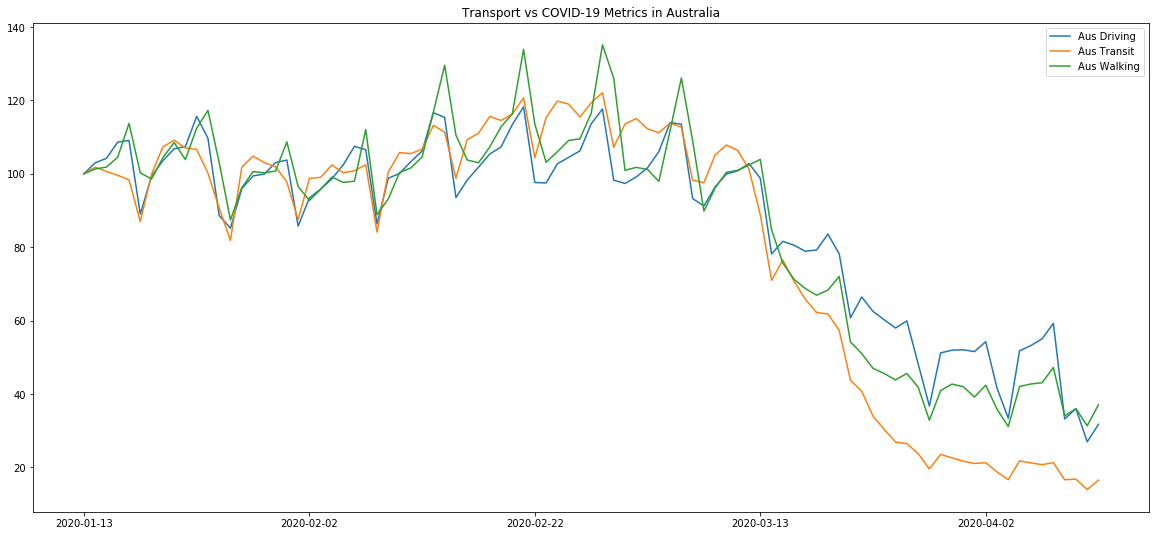

In [372]:
dAus.plot(figsize=(20,9))
plt.title('Transport vs COVID-19 Metrics in Australia')

In [373]:
#Set DUSA as its own Data Frame
#Should allow to compare differenr regions
dUSA = df[df['region']=='United States'].iloc[:,3:].T
dUSA.columns = ['USA Driving', 'USA Transit', 'USA Walking']

In [374]:
dUSA

,USA Driving,USA Transit,USA Walking
2020-01-13,100.00,100.00,100.00
2020-01-14,102.97,97.77,99.59
2020-01-15,105.19,98.84,101.87
2020-01-16,108.48,99.04,100.60
2020-01-17,125.51,108.03,121.36
...,...,...,...
2020-04-08,56.21,24.51,48.77
2020-04-09,56.90,23.69,46.28
2020-04-10,63.87,24.31,51.97
2020-04-11,57.51,22.65,50.69


Text(0.5, 1.0, 'Transport vs COVID-19 Metrics in USA')

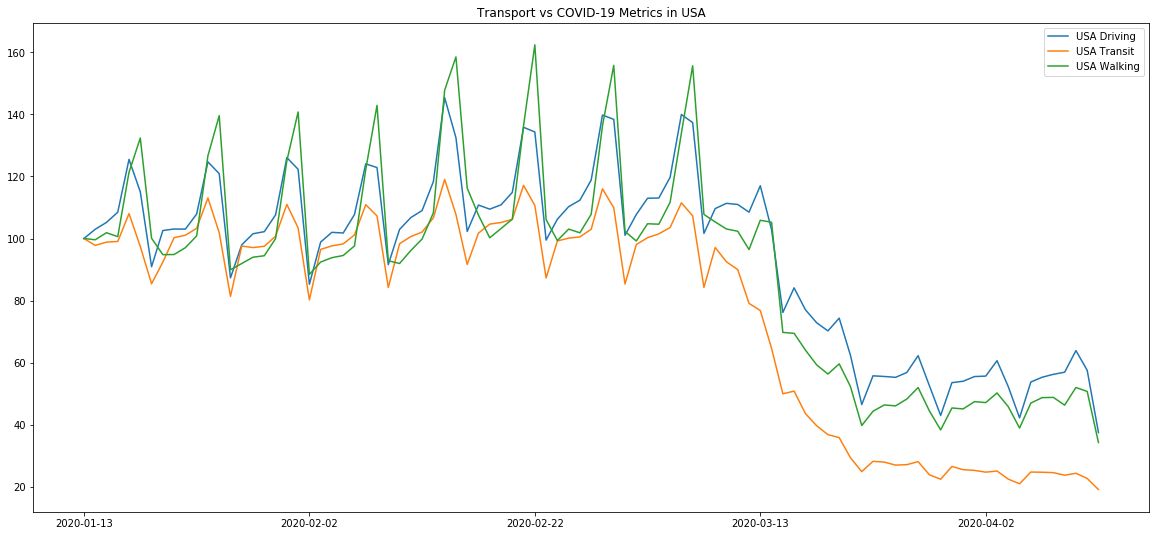

In [375]:
dUSA.plot(figsize=(20,9))
plt.title('Transport vs COVID-19 Metrics in USA')

In [378]:
#Set DUK as its own Data Frame
#Should allow to compare differenr regions
dUK = df[df['region']=='UK'].iloc[:,3:].T
dUK.columns = ['UK Driving', 'UK Transit', 'UK Walking']

In [379]:
dUK

,UK Driving,UK Transit,UK Walking
2020-01-13,100.00,100.00,100.00
2020-01-14,104.86,104.20,106.14
2020-01-15,106.40,105.37,114.37
2020-01-16,104.28,103.89,112.59
2020-01-17,109.27,109.38,128.99
...,...,...,...
2020-04-08,36.67,15.59,41.69
2020-04-09,38.05,15.45,43.55
2020-04-10,34.40,14.92,45.19
2020-04-11,31.74,14.17,44.40


Text(0.5, 1.0, 'Transport vs COVID-19 Metrics in UK')

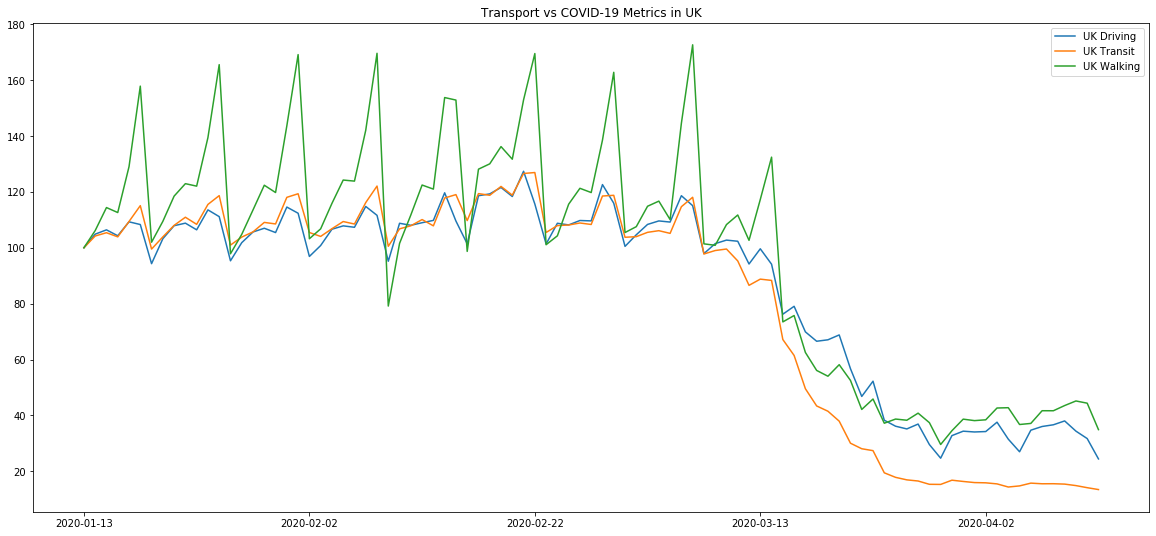

In [380]:
dUK.plot(figsize=(20,9))
plt.title('Transport vs COVID-19 Metrics in UK')

<Figure size 432x288 with 0 Axes>

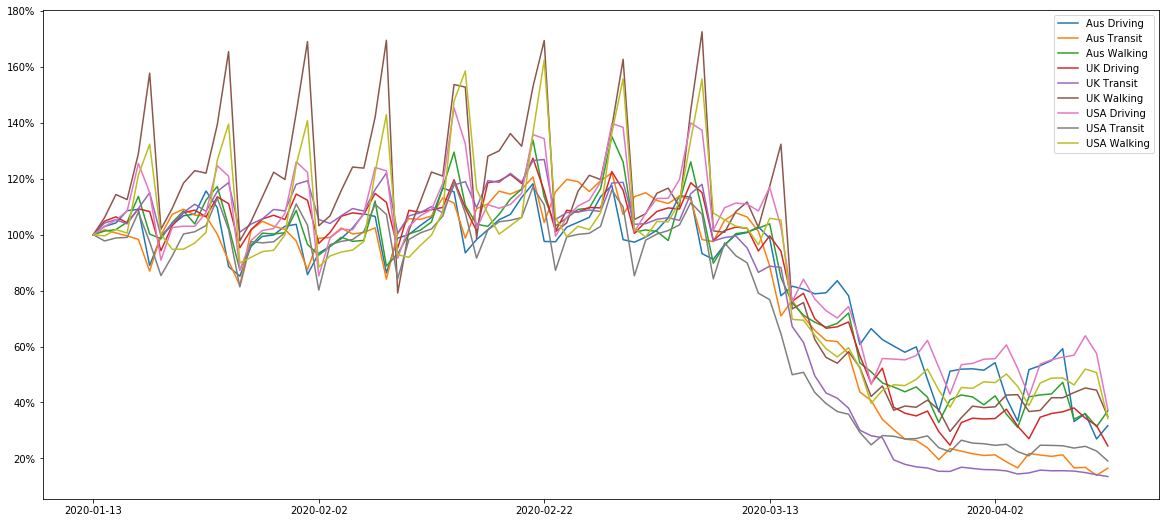

In [381]:
#Comparing AUS, USA and UK

fig = plt.figure()

ax = dAus.plot(figsize=(20,9))
dUK.plot(ax=ax)
dUSA.plot(ax=ax)
#Set Y axi
ax.yaxis.set_major_formatter(PercentFormatter())

In [382]:
#Comparing all driving, all transit and all walking data

In [383]:
dAusd = df[df['region']=='Australia'].iloc[:1,3:].T
dAusd.columns=['Aus Driving']

In [384]:
dUKd = df[df['region']=='UK'].iloc[:1,3:].T
dUKd.columns=['UK Driving']

In [385]:
dUSAd = df[df['region']=='United States'].iloc[:1,3:].T
dUSAd.columns=['USA Driving']

<Figure size 432x288 with 0 Axes>

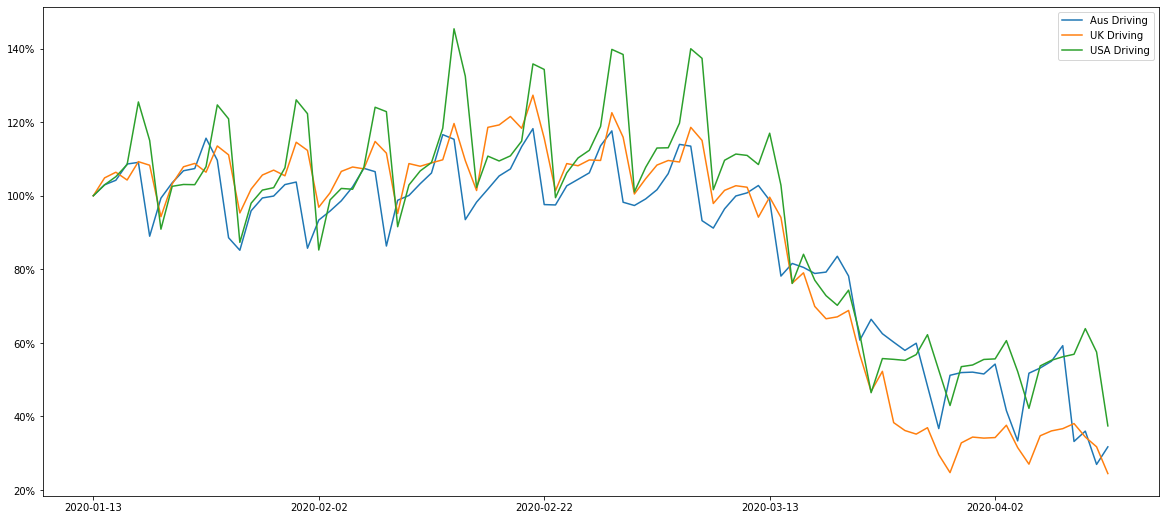

In [386]:
#Comparing AUS, USA and UK Driving

fig = plt.figure()

ax = dAusd.plot(figsize=(20,9))
dUKd.plot(ax=ax)
dUSAd.plot(ax=ax)
#Set Y axis as percent format
ax.yaxis.set_major_formatter(PercentFormatter())

In [387]:
#Now for Transit Data

In [388]:
dAusT = df[df['region']=='Australia'].iloc[1:2,3:].T
dAusT.columns=['Aus Transit']

In [389]:
dUKT = df[df['region']=='UK'].iloc[1:2,3:].T
dUKT.columns=['UK Transit']

In [390]:
dUSAT = df[df['region']=='United States'].iloc[1:2,3:].T
dUSAT.columns=['USA Transit']

<Figure size 432x288 with 0 Axes>

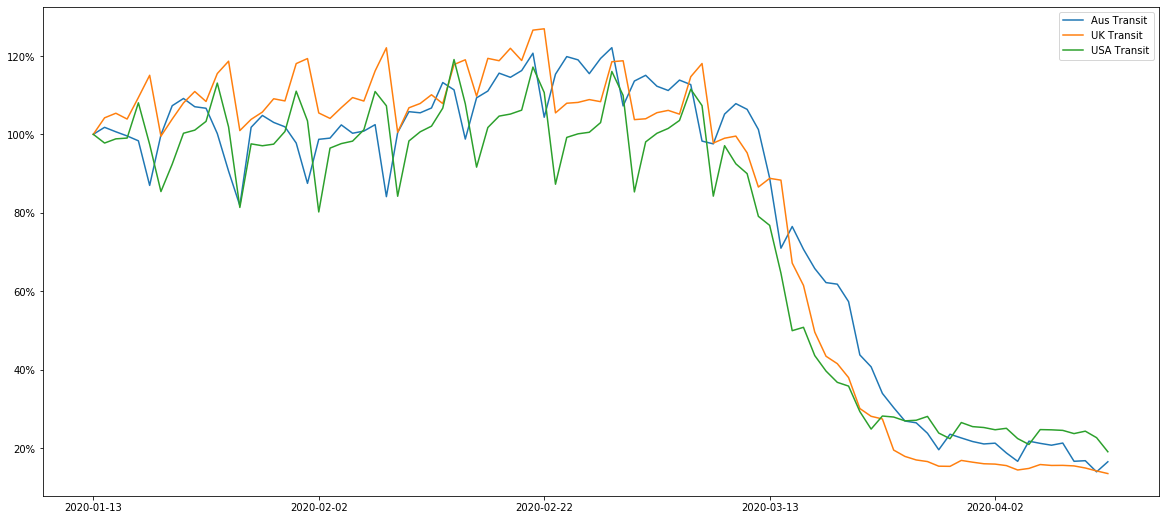

In [391]:
#Comparing AUS, USA and UK Transit

fig = plt.figure()

ax = dAusT.plot(figsize=(20,9))
dUKT.plot(ax=ax)
dUSAT.plot(ax=ax)
#Set Y axis as percent format
ax.yaxis.set_major_formatter(PercentFormatter())

In [392]:
#Finally Compare Walking in Aus, UK, USA


In [393]:
dAusW = df[df['region']=='Australia'].iloc[2:3,3:].T
dAusW.columns=['Aus Walking']

In [394]:
dUKW = df[df['region']=='UK'].iloc[2:3,3:].T
dUKW.columns=['UK Walking']

In [395]:
dUSAW = df[df['region']=='United States'].iloc[2:3,3:].T
dUSAW.columns=['USA Walking']

<Figure size 432x288 with 0 Axes>

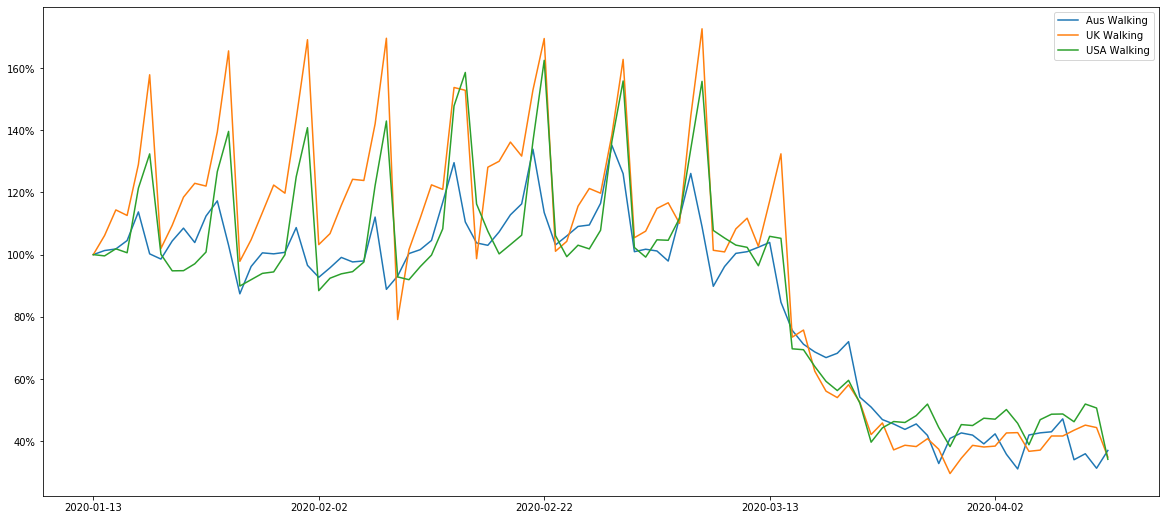

In [396]:
#Comparing AUS, USA and UK Transit

fig = plt.figure()

ax = dAusW.plot(figsize=(20,9))
dUKW.plot(ax=ax)
dUSAW.plot(ax=ax)
#Set Y axis as percent format
ax.yaxis.set_major_formatter(PercentFormatter())